In [7]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
labels = []
data = []

In [3]:
with open("cifar-10-batches-py/data_batch_1", "rb") as f:
    mdict = pickle.load(f, encoding="bytes")
    
print(mdict.keys())
mdict[b"data"]

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [4]:
for i in range(5):
    with open("cifar-10-batches-py/data_batch_" + str(i+1), "rb") as f:
        mdict = pickle.load(f, encoding="bytes")
        for i in range(len(mdict[b"data"])):
            data.append(mdict[b"data"][i])
            labels.append(mdict[b"labels"][i])

frog


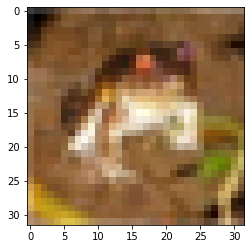

truck


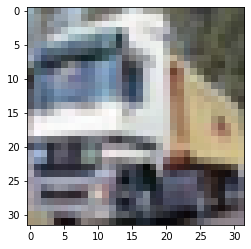

truck


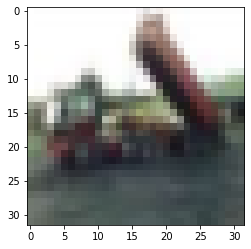

deer


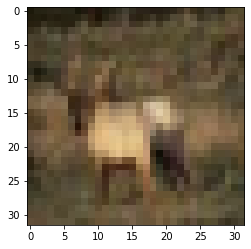

automobile


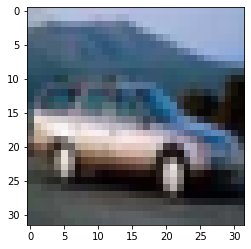

automobile


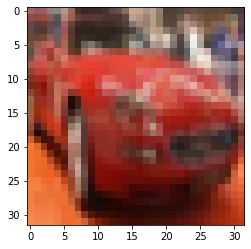

bird


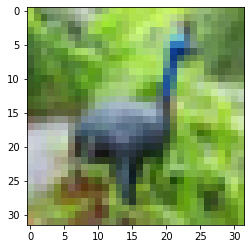

horse


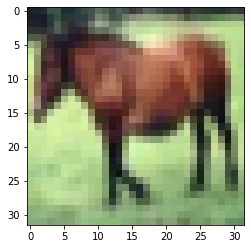

ship


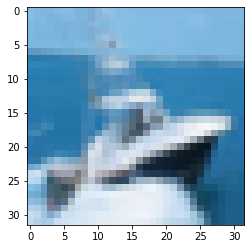

cat


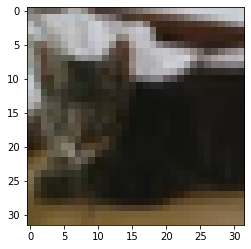

In [5]:
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    print(labelNames[labels[i]])
    plt.imshow(np.transpose(data[i].reshape((3,32,32)), 
                           (1,2,0)))
    plt.show()

## Experiment Settings:

- With and without memory.
    - 0: Without memory.
    - 1: With memory.
- Different generational data sampling methods to try:
    - 0: All examples every generation.
    - 1: Random stratified subsample per generation.
    - 2: Single class per generation.
- Different ordering in generation:
    - 0: Single individual guesses all samples, then do next individual.
    - 1: All individual guess single sample, then do next sample.
- Different Fitness methods:
    - 0: Mean score across classes.
    - 1: Min score across classes.
    - 2: Static Lexicographic.
    - 3: Dynamic Lexicographic.
    - 4: Score of only current class (only with data sampling #2).
    - 5: Score of only current class + diminishing previous score (only with data sampling #2).
    
40 Experiments to run.

## Experiment Process:
- Separate environments for memory or not.
- First get list of all labels and list of all datas.
- Setup TPG
- run stuff etc.

## Reporting:
- Generational log:
    - Accuracy per class per generation.
    - Cumulative time per generation (hours).
    - Size of best agent per generation.
- Confusion matrix per generation of best individual.
- Final scores on test data.
- Full population and best individual after last generation.

cat


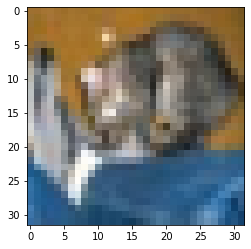

ship


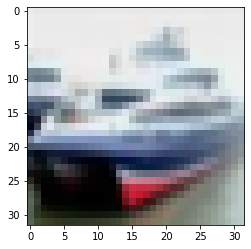

ship


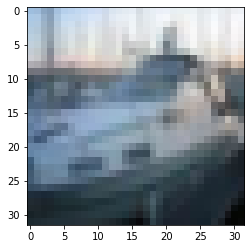

airplane


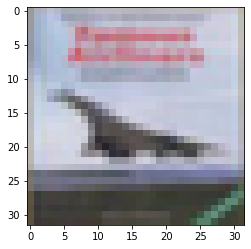

frog


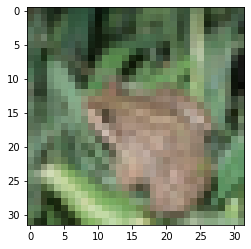

frog


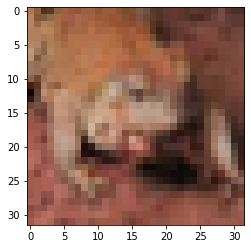

automobile


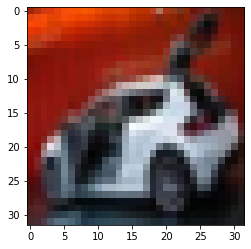

frog


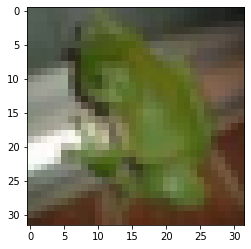

cat


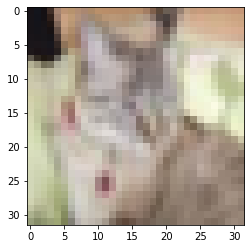

automobile


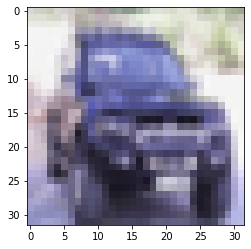

In [6]:
df = 

In [18]:
df = pd.DataFrame(labels).add_prefix("y").join(pd.DataFrame(data).add_prefix("x"))
df.head()

,y0,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x3062,x3063,x3064,x3065,x3066,x3067,x3068,x3069,x3070,x3071
0,3,158,159,165,166,160,156,162,159,158,...,130,123,145,167,182,175,145,124,129,110
1,8,235,231,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,8,158,158,139,132,166,182,187,193,199,...,45,46,44,44,43,52,37,8,3,7
3,0,155,167,176,190,177,166,168,166,170,...,52,55,70,103,105,72,53,50,52,50
4,6,65,70,48,30,23,40,44,45,45,...,102,127,156,139,131,130,147,136,146,117


In [26]:
sampleDf = df.groupby("y0", group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))
sampleDf

,y0,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x3062,x3063,x3064,x3065,x3066,x3067,x3068,x3069,x3070,x3071
297,0,123,125,126,126,127,129,130,130,127,...,253,254,253,254,254,254,254,255,255,254
5571,0,255,255,255,253,252,250,252,254,252,...,68,66,68,66,65,65,62,63,65,66
3554,1,69,21,20,20,24,33,73,98,148,...,180,175,174,175,178,179,177,177,173,173
7893,1,239,238,246,250,250,250,251,251,252,...,7,6,5,5,3,2,4,7,11,12
1248,2,124,122,117,111,113,106,103,107,113,...,152,155,164,168,167,164,158,151,155,164
5492,2,100,107,112,117,123,124,125,125,125,...,99,111,109,97,104,121,118,106,108,127
9839,3,118,142,135,158,172,141,134,159,158,...,100,88,47,41,55,55,54,42,37,37
4391,3,122,125,126,128,130,131,132,132,134,...,16,17,46,56,94,142,142,140,140,137
5379,4,43,43,45,58,72,62,58,61,64,...,55,53,54,53,53,53,57,65,70,67
9029,4,72,58,58,47,63,84,64,51,55,...,69,63,57,59,68,73,71,69,72,73


In [45]:
data = np.array(sampleDf)[:,1:]
labels = np.array(sampleDf)[:,0]

In [46]:
labels

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9])

In [58]:
pd.DataFrame(labels)[0].value_counts()[0]

2